<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

In [52]:
import pandas as pd

# Specify the path to your CSV file
csv_path = 'dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

df.head(5)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [59]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd

file_path = 'dataset.csv'
# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Step 2: Print the first 5 rows of the DataFrame
#print(df.head())

# Basic DataFrame check
def basic_dataframe_check(df):
    # Show the size of the dataframe (rows, columns)
    print("Size of DataFrame: ", df.shape)
    
    # Check for duplicate records
    duplicate_count = df.duplicated().sum()
    print("Number of duplicate records: ", duplicate_count)
    
    #if duplicate_count > 0:
    #    print("Duplicate records:")
    #    print(df[df.duplicated()])
    
    # Check for missing values in each column
    print("\nMissing values in each column:")
    print(df.isnull().sum())

# Run the basic check
#basic_dataframe_check(df)
# Function to remove duplicate records
def remove_duplicates(df):
    # Remove duplicates and keep the first occurrence
    df_cleaned = df.drop_duplicates(keep='first')
    
    # Display the size of the DataFrame after removing duplicates
    #print(f"Size of DataFrame after removing duplicates: {df_cleaned.shape}")
    
    return df_cleaned

# Example usage:
df_cleaned = remove_duplicates(df)

# Function to impute numerical missing values with the column average
def impute_missing_values(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Impute missing values in numerical columns with the column average
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            avg_value = df[col].mean()
            df.loc[df[col].isnull(), col] = avg_value
            print(f"Imputed missing values in '{col}' with the average: {avg_value}")
    
    return df

# Example usage:

print("Cleaned df")
basic_dataframe_check(df_cleaned)
df_imputed = impute_missing_values(df_cleaned)
print("Imputed df")
basic_dataframe_check(df_imputed)

Cleaned df
Size of DataFrame:  (17812, 9)
Number of duplicate records:  0

Missing values in each column:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64
Imputed missing values in 'tax' with the average: 113.31472850805773
Imputed df
Size of DataFrame:  (17812, 9)
Number of duplicate records:  0

Missing values in each column:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


Outliers in 'year':
         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
13464    C-MAX  2008       Manual    27930   Petrol  235.0  39.8         1.8   
13468   Fiesta  2009       Manual    62000   Petrol  145.0  49.6         1.2   
13480   Fiesta  2008       Manual   116000   Diesel   20.0  67.3         1.6   
13485   Mondeo  2009    Automatic   110000   Diesel  300.0  39.8         2.0   
13502     Kuga  2009       Manual   117000   Diesel  235.0  44.1         2.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17755   Fiesta  2007       Manual    79000   Petrol  160.0  41.5         1.2   
17758    Focus  2006    Automatic    70730   Petrol  260.0  36.7         1.6   
17760    C-MAX  2007       Manual    82000   Petrol  235.0  39.8         1.8   
17761    Focus  2005    Automatic    87908   Petrol  265.0  36.7         1.6   
17816   Fiesta  2009       Manual    49500   Petrol  150.0  49.6         1.4   

       price  
1346

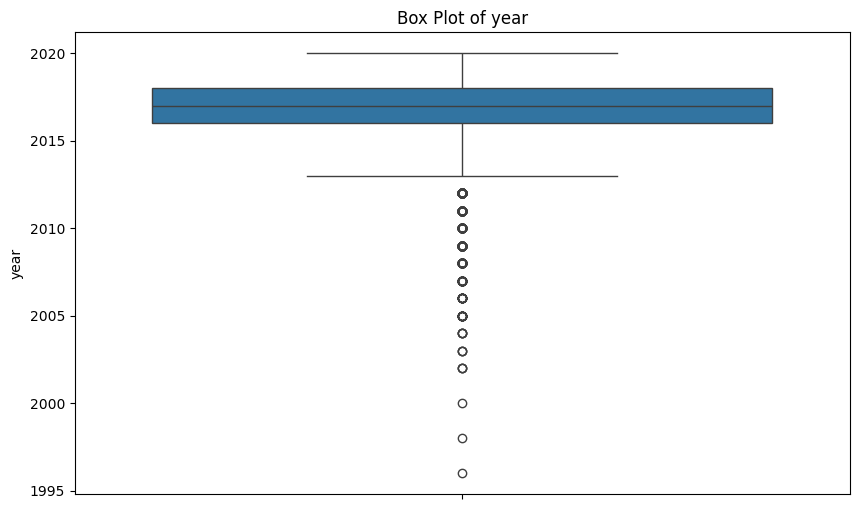

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def find_outliers(df, column):
    # Calculate the first (Q1) and third (Q3) quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for detecting outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"Outliers in '{column}':")
    print(outliers)
    df_cleaned = df[(df[column] <= upper_bound)]
    
    print(f"Removed outliers from '{column}'")
    print(f"Number of rows before removing outliers: {df.shape[0]}")
    print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")
    
    return df_cleaned

# Function to show box plot for visualizing outliers
def show_box_plot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.show()


# Specify the column for which you want to detect outliers
column_name = 'year'  # Example: replace 'price' with your actual column name

# Find and show the outliers
df_cleaned = find_outliers(df_imputed, column_name)

# Show box plot for visualizing outliers
show_box_plot(df_cleaned, column_name)

In [64]:
# Function to find the top 5 attributes with the highest correlation to the target attribute
def top_correlated_attributes(df, target_column):
    # Check for non-numeric (categorical) columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    
    # Apply one-hot encoding to convert categorical columns to numeric
    df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)
    
    # Calculate the correlation matrix on the encoded DataFrame
    correlation_matrix = df_encoded.corr()
    
    # Get correlations with the target attribute, sort values, and exclude the target itself
    target_correlation = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)
    
    # Get the top 5 attributes with the highest correlation
    top_5_attributes = target_correlation.head(5)
    
    print("Top 5 attributes with the highest correlation to '{}':".format(target_column))
    print(top_5_attributes)
    
    return top_5_attributes


# Specify the target attribute (replace 'target' with your actual target column name)
target_column = 'price' 

# Get the top 5 correlated attributes
top_5_correlated = top_correlated_attributes(df_cleaned, target_column)

Top 5 attributes with the highest correlation to 'price':
year              0.645236
engineSize        0.411476
tax               0.406113
model_ Kuga       0.281914
model_ Mustang    0.267527
Name: price, dtype: float64


In [65]:
# Function to count the number of entries for each unique value of a specific attribute
def count_unique_values(df, column_name):
    # Count the occurrences of each unique value in the specified column
    value_counts = df[column_name].value_counts()
    
    print(f"Count of unique values in column '{column_name}':")
    print(value_counts)
    
    return value_counts


# Specify the column name (replace 'attribute' with your actual column name)
column_name = 'fuelType'  

# Get the count of unique values in the specified column
unique_value_counts = count_unique_values(df_cleaned, column_name)

Count of unique values in column 'fuelType':
fuelType
Petrol      12080
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


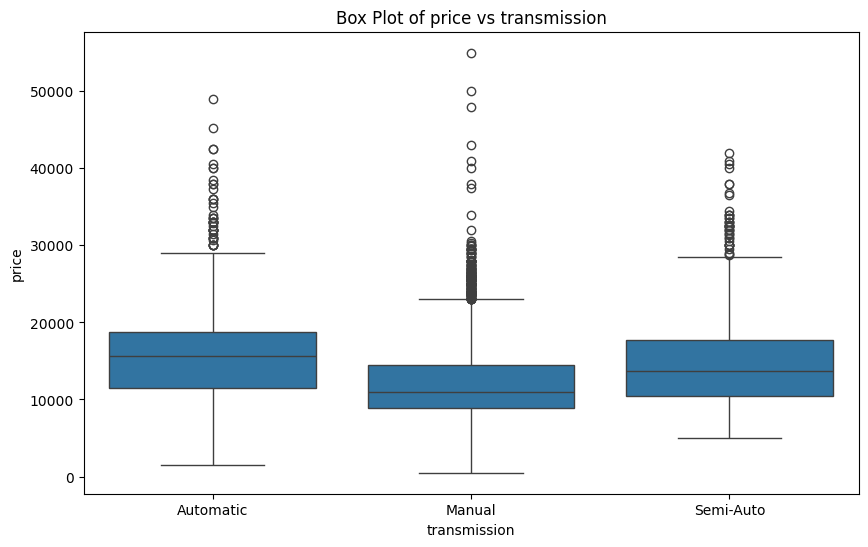

In [66]:
# Function to create a box plot between source and target attributes
def create_box_plot(df, source_column, target_column):
    # Create the box plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=source_column, y=target_column, data=df)
    
    # Add labels and title
    plt.title(f'Box Plot of {target_column} vs {source_column}')
    plt.xlabel(source_column)
    plt.ylabel(target_column)
    
    # Show the plot
    plt.show()

# Load the dataset

# Specify the source and target columns (replace with actual column names)
source_column = 'transmission'  # Example: replace 'fuelType' with your actual source column
target_column = 'price'     # Example: replace 'price' with your actual target column

# Create the box plot
create_box_plot(df_cleaned, source_column, target_column)

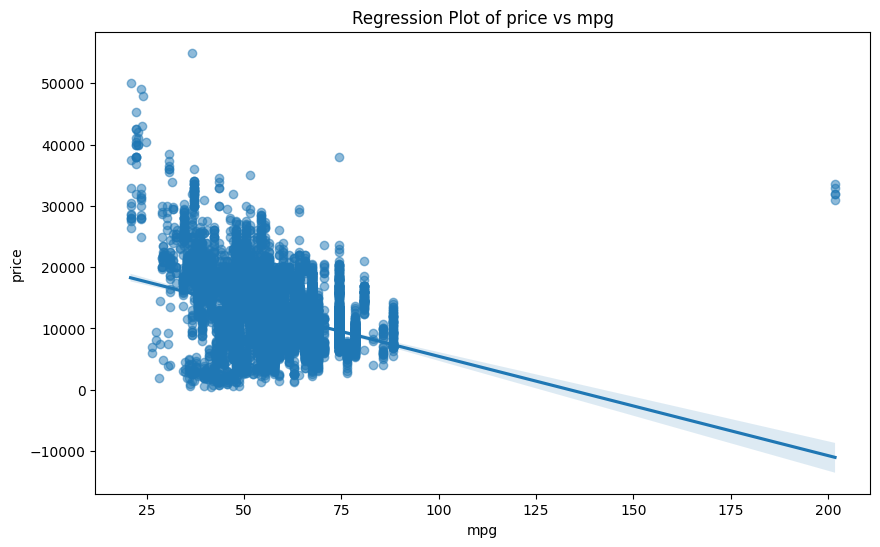

In [67]:
# Function to create a regression plot between source and target attributes
def create_regression_plot(df, source_column, target_column):
    # Create the regression plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.regplot(x=source_column, y=target_column, data=df, scatter_kws={'alpha':0.5})
    
    # Add labels and title
    plt.title(f'Regression Plot of {target_column} vs {source_column}')
    plt.xlabel(source_column)
    plt.ylabel(target_column)
    
    # Show the plot
    plt.show()


# Specify the source and target columns (replace with actual column names)
source_column = 'mpg'  # Example: replace 'mileage' with your actual source column
target_column = 'price'    # Example: replace 'price' with your actual target column

# Create the regression plot
create_regression_plot(df_cleaned, source_column, target_column)

## Model Deployment and Evaluation

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create the feature matrix X and target variable y
X = df[['mpg']]
y = df['price']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Compute R^2 score
r2 = r2_score(y, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Print R^2 and MSE
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.1200064498669362
Mean Squared Error: 19781452.810028087


In [69]:
from sklearn.model_selection import train_test_split

# Create the feature matrix X and target variable y
X = df[['mpg', 'engineSize', 'year', 'mileage', ]]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print R^2 and MSE
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.7255175199712549
Mean Squared Error: 6151715.527641305


In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Create the feature matrix X and target variable y
X = df[['mpg', 'engineSize', 'year', 'mileage', ]]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print R^2 and MSE
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.7514711544716326
Mean Squared Error: 5570041.329936664


In [72]:
from sklearn.linear_model import Ridge

#Prepare the data by splitting it into independent variables (X) and the dependent variable (y). 
X = df[['mpg', 'engineSize', 'year', 'mileage', ]]
y = df['price']

#Split the data into training and testing sets such that 20% of data makes up the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a Ridge Regression model with a regularization parameter of 0.1 and fit it to the training data
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

#Make predictions on the test data
y_test_pred = model.predict(X_test)

#Evaluate the model using R²
r2 = r2_score(y_test, y_test_pred)
print('R-squared: ', r2)

R-squared:  0.7255174361030938


In [73]:
#Prepare the data by splitting it into independent variables (X) and the dependent variable (y). 
X = df[['mpg', 'engineSize', 'year', 'mileage', ]]
y = df['price']

#Split the data into training and testing sets such that 20% of data makes up the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Perform a second order polynomial transform on both the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


#Create a Ridge Regression model with a regularization parameter of 0.1 and fit it to the training data
model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train)

#Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

#Evaluate the model using R² and MSE
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MSE: ', mse)
print('R-squared: ', r2)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.23067e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE:  5613423.54339337
R-squared:  0.7495354899427336


In [75]:
from sklearn.linear_model import Ridge

#Prepare the data by splitting it into independent variables (X) and the dependent variable (y). 
X = df[['mpg', 'engineSize', 'year', 'mileage',]]
y = df['price']

#Split the data into training and testing sets such that 20% of data makes up the testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Perform a second order polynomial transform on both the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


#Set up the parameter grid for the Grid Search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

#Initialize the Grid Search object with Ridge Regression and the parameter grid, and specify 4-fold cross-validation
grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=4)

#Fit the Grid Search object to the transformed training data
grid_search.fit(X_train_poly, y_train)

#Get the optimal alpha value
optimal_alpha = grid_search.best_params_['alpha']
print('Optimal alpha: ', optimal_alpha)


#Create a Ridge Regression model with a regularization parameter of 0.1 and fit it to the training data
model = Ridge(alpha=optimal_alpha)
model.fit(X_train_poly, y_train)

#Make predictions on the test data
y_test_pred = model.predict(X_test_poly)

#Evaluate the model using R² and MSE
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MSE: ', mse)
print('R-squared: ', r2)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.19413e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.90019e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.95698e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.96945e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.15542e-24): res

Optimal alpha:  100


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.2494e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE:  5533152.82222218
R-squared:  0.7531170773099913


In [35]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume you have a pandas data frame called 'data_frame' with multiple columns: 'source_variable_1', 'source_variable_2', ..., 'target_variable'

# Create a pipeline that performs parameter scaling, polynomial feature generation, and linear regression
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

# Train the model using the source and target variables
pipeline.fit(X, y)

# Make predictions using the trained model
y_pred = pipeline.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

# Additional details:
# - The 'make_pipeline()' function from the 'sklearn.pipeline' module is used to create a pipeline.
# - The 'StandardScaler' class from the 'sklearn.preprocessing' module is used to perform parameter scaling.
# - The 'PolynomialFeatures' class from the 'sklearn.preprocessing' module is used to create polynomial features.
# - The 'LinearRegression' class from the 'sklearn.linear_model' module is used for linear regression.
# - The pipeline automatically applies the transformations in the specified order.

Mean Squared Error (MSE): 5287319.436635553
Coefficient of Determination (R^2): 0.7647894193406382


MSE: 6144210.54
R^2: 0.73


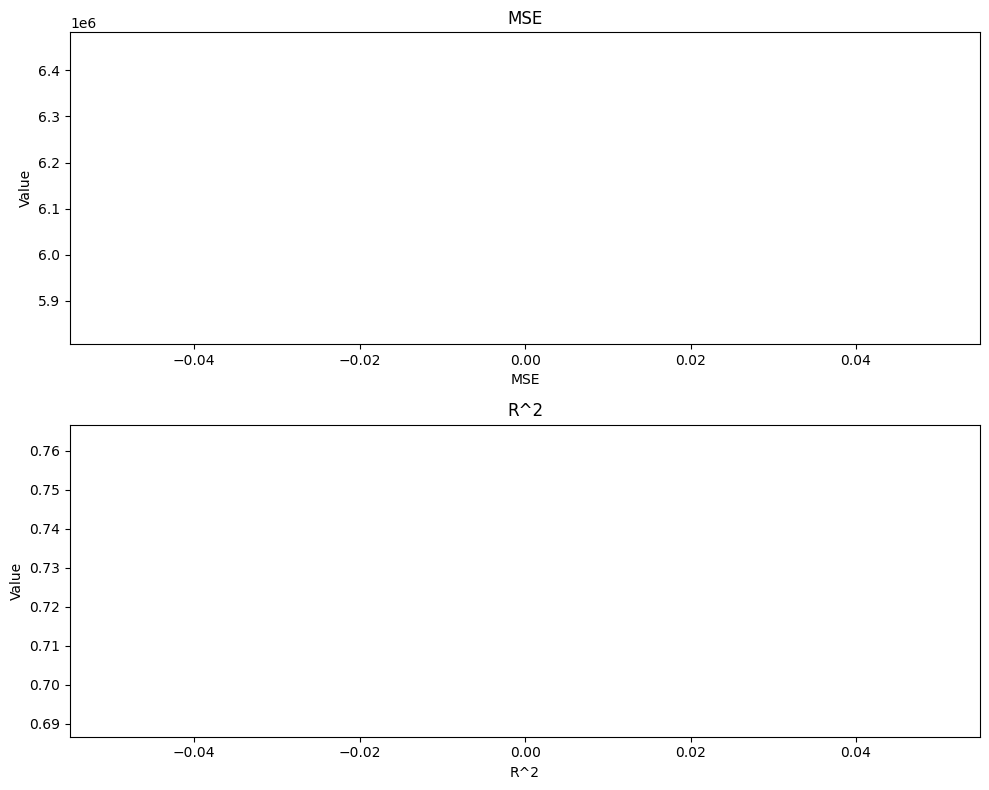

In [44]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Define the model parameters to tune
param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}
# Create a grid search object
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X)

# Calculate the MSE and R^2 values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the results
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

# Plot the MSE and R^2 values
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(mse)
plt.title('MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.subplot(2, 1, 2)
plt.plot(r2)
plt.title('R^2')
plt.xlabel('R^2')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

---


# Test Environment


In [ ]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
